In [1]:
%pylab inline
import pandas as pd
from constants import *
from functions import load_data

Populating the interactive namespace from numpy and matplotlib


In [2]:
used_days = ALL_DAYS[0:30]
total_df = load_data(used_days)
reindexed = total_df.set_index(['Symbol', 'Day', 'Time'])

INFO:root:Loading data for days:['20120924', '20120925', '20120926', '20120927', '20120928', '20121001', '20121002', '20121003', '20121004', '20121005', '20121008', '20121009', '20121010', '20121011', '20121012', '20121015', '20121016', '20121017', '20121018', '20121019', '20121022', '20121023', '20121024', '20121025', '20121026', '20121031', '20121101', '20121102', '20121105', '20121106']
2015-06-08 17:17:30,937 - INFO - Loading data for days:['20120924', '20120925', '20120926', '20120927', '20120928', '20121001', '20121002', '20121003', '20121004', '20121005', '20121008', '20121009', '20121010', '20121011', '20121012', '20121015', '20121016', '20121017', '20121018', '20121019', '20121022', '20121023', '20121024', '20121025', '20121026', '20121031', '20121101', '20121102', '20121105', '20121106']


## Price and volume on sample day

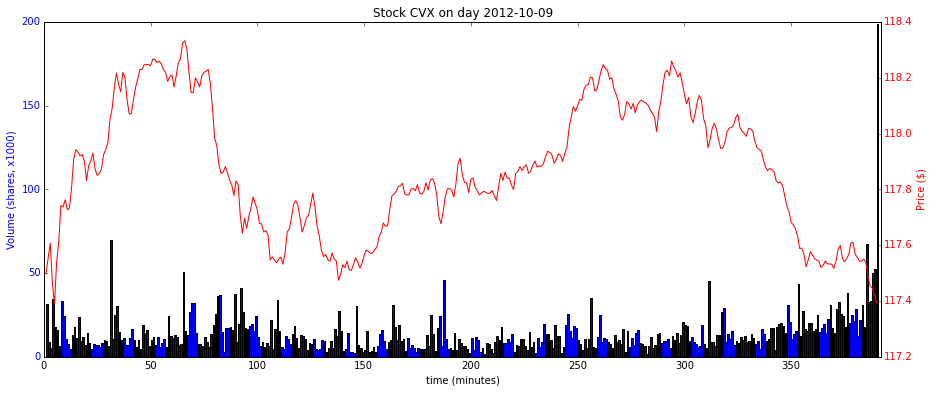

In [8]:
np.random.seed(1)
symbol=np.random.choice(total_df.Symbol.unique())
day=np.random.choice(total_df.Day.unique())
data = reindexed.ix[symbol].ix[day]

t = np.arange(1,len(data)+1, 1.)
#plot
fig, ax1 = plt.subplots(figsize=(15,6))
# plot volume
ax1.bar(t, data.Volume/1000.)
ax1.set_xlabel('time (minutes)')
# Make the y-axis label and tick labels match the line color.
ax1.set_ylabel('Volume (shares, x1000)', color='b')
for tl in ax1.get_yticklabels():
    tl.set_color('b')
#plot price
ax2 = ax1.twinx()
ax2.plot(range(1, 391), data.Price, 'r')
ax2.set_ylabel('Price ($)', color='r')
for tl in ax2.get_yticklabels():
    tl.set_color('r')
plt.xlim([0,len(data)+2])
plt.title("Stock %s on day %s" %(symbol,pd.to_datetime(day).date()))
plt.savefig(GRAPHICSFOLDER+"VolumePriceRealData.pdf")

## Historically estimated quantities

In [9]:
from volume_estimation import VolumeEstimatorStatic, VolumeEstimatorLogNormal

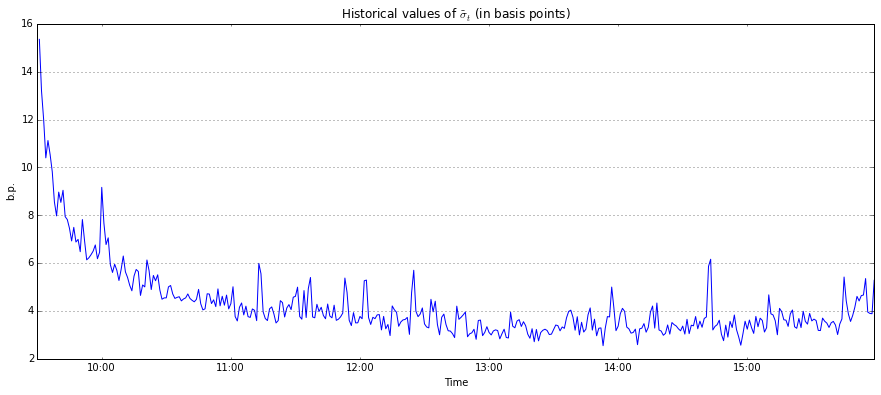

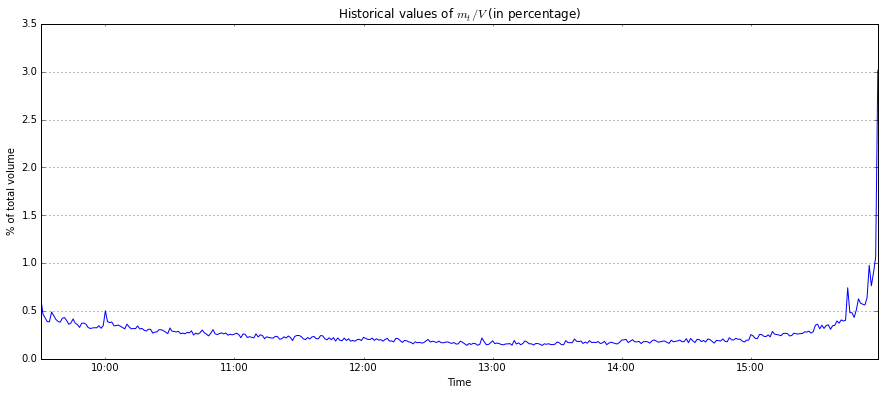

In [11]:
static_parameters = VolumeEstimatorStatic().fit(total_df)

figure(figsize=(15,6))
(static_parameters['sigmas']*10000.).plot()
title('Historical values of $\\tilde \sigma_t$ (in basis points)')
ylabel('b.p.')
plt.savefig(GRAPHICSFOLDER+"SigmatProfileHistorical.pdf")

volume_profile = pd.Series(diff(np.concatenate([static_parameters['M_t'], [1.]])),
                          index=static_parameters['sigmas'].index)
figure(figsize=(15,6))
(volume_profile*100.).plot()
title('Historical values of $m_t/V$ (in percentage)')
ylabel('% of total volume')
plt.savefig(GRAPHICSFOLDER+"VolumeProfileHistorical.pdf")

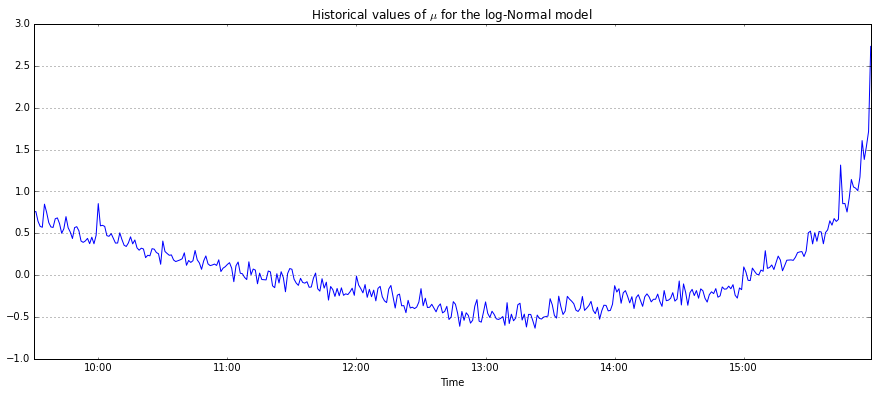

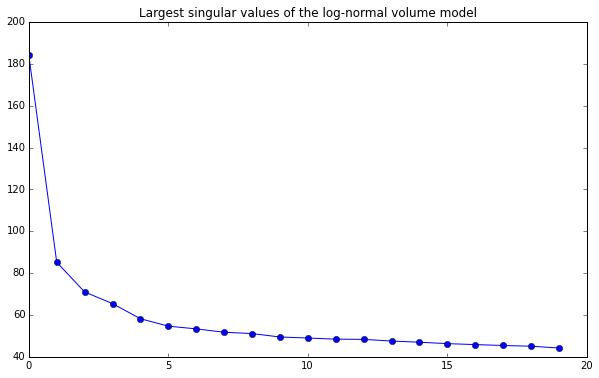

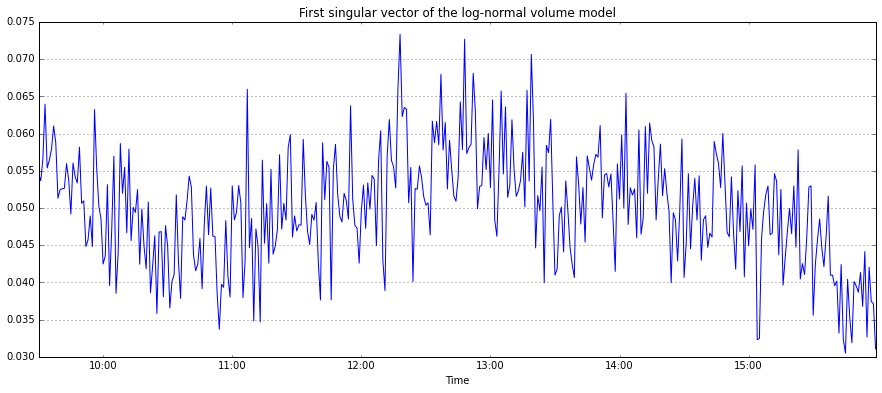

In [12]:
model_meta_parameters = {'num_factors':1, 'bandwidth':3}
log_normal_parameters = VolumeEstimatorLogNormal(model_meta_parameters, test=True).fit(total_df)

figure(figsize=(15,6))
log_normal_parameters['mu'].plot()
title('Historical values of $\mu$ for the log-Normal model')
#ylabel('% of total volume')
plt.savefig(GRAPHICSFOLDER+"MuHistorical.pdf")

figure(figsize=(10,6))
plot(log_normal_parameters['S_orig'][:20], 'o-')
title('Largest singular values of the log-normal volume model')
plt.savefig(GRAPHICSFOLDER+"LargestSingularValues.pdf")

figure(figsize=(15,6))
first_singular_vector = pd.Series(log_normal_parameters['U'][:,0], log_normal_parameters['mu'].index)
(-first_singular_vector).plot()
title('First singular vector of the log-normal volume model')
plt.savefig(GRAPHICSFOLDER+"FirstSingularVector.pdf")


In [ ]:
print log_normal_parameters['b']

#### Other singular vectors

In [ ]:
figure(figsize=(15,6))
(-pd.Series(log_normal_parameters['U'][:,1], log_normal_parameters['mu'].index)).plot()

In [ ]:
figure(figsize=(15,6))
(-pd.Series(log_normal_parameters['U'][:,2], log_normal_parameters['mu'].index)).plot()

In [ ]:
figure(figsize=(15,6))
(-pd.Series(log_normal_parameters['U'][:,3], log_normal_parameters['mu'].index)).plot()